In [3]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


# Loading csv data
bids = pd.read_csv('./datas/bids.csv')
train = pd.read_csv('./datas/train.csv')

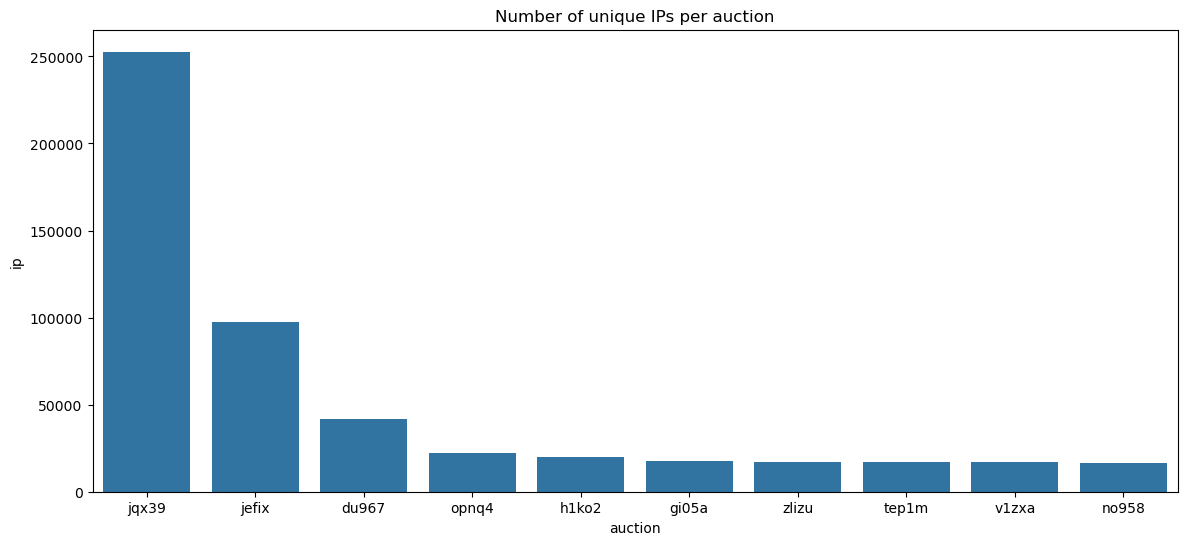

In [26]:
# 1. Get the number of unique IPs per auction
auctionIpCounts = bids.groupby('auction')['ip'].nunique().reset_index()

# Draw the result
auctionIpCounts = auctionIpCounts.sort_values('ip', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x='auction', y='ip', data=auctionIpCounts.head(10))
plt.title('Number of unique IPs per auction')
plt.show()

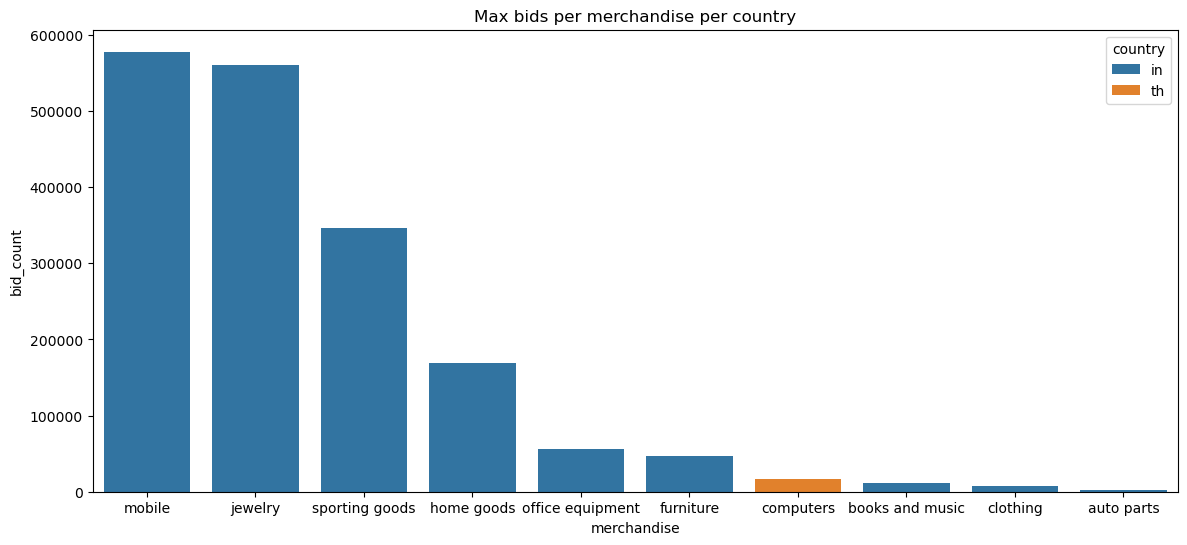

In [27]:
# 2. Count max bids per merchandise per country
groupedMerchadiseByCountry = bids.groupby(['merchandise', 'country']).size().reset_index(name='bid_count')
max_bids_per_merchandise = groupedMerchadiseByCountry.loc[groupedMerchadiseByCountry.groupby('merchandise')['bid_count'].idxmax()]
max_bids_per_merchandise = max_bids_per_merchandise.sort_values('bid_count', ascending=False)
# Draw result
plt.figure(figsize=(14, 6))
sns.barplot(x='merchandise', y='bid_count', hue='country', data=max_bids_per_merchandise.head(10))
plt.title('Max bids per merchandise per country')
plt.show()

/tmp/ipykernel_17062/1236244236.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = bids.groupby(['period', 'auction'])['bidder_id'].nunique().reset_index(name='unique_bidders')
/tmp/ipykernel_17062/1236244236.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_unique_bidders = grouped.groupby('period')['unique_bidders'].mean().reset_index(name='average_unique_bidders')


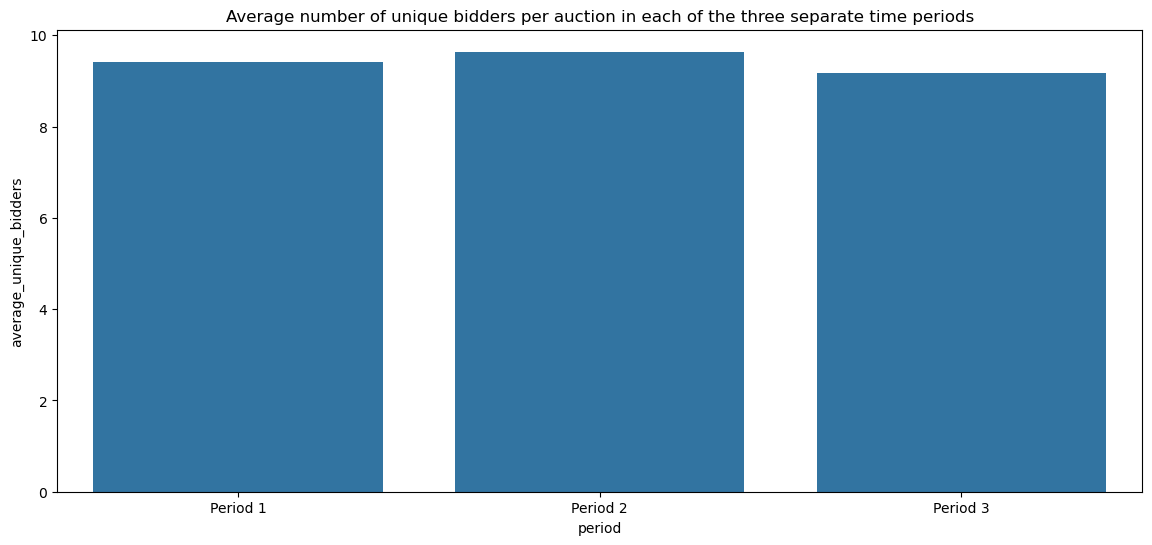

In [29]:
# 3. Calculate average number of unique bidders per auction in each of the three separate time periods
# Convert the time column to datetime
bids['time'] = pd.to_datetime(bids['time'])
start_time = bids['time'].min()
end_time = bids['time'].max()
periods = pd.date_range(start=start_time, end=end_time, periods=4)
# Attribute a period to each record
bids['period'] = pd.cut(bids['time'], bins=periods, labels=['Period 1', 'Period 2', 'Period 3'])
# Group by period and auction, then find unique bidders for each auction
grouped = bids.groupby(['period', 'auction'])['bidder_id'].nunique().reset_index(name='unique_bidders')
# Calculate the average number of unique bidders per auction for each period
average_unique_bidders = grouped.groupby('period')['unique_bidders'].mean().reset_index(name='average_unique_bidders')

#Draw the result
average_unique_bidders = average_unique_bidders.sort_values('average_unique_bidders', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x='period', y='average_unique_bidders', data=average_unique_bidders)
plt.title('Average number of unique bidders per auction in each of the three separate time periods')
plt.show()

/tmp/ipykernel_17062/940537315.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fraction_robot_bids', y='country', data=merged_df.head(10), palette='viridis')


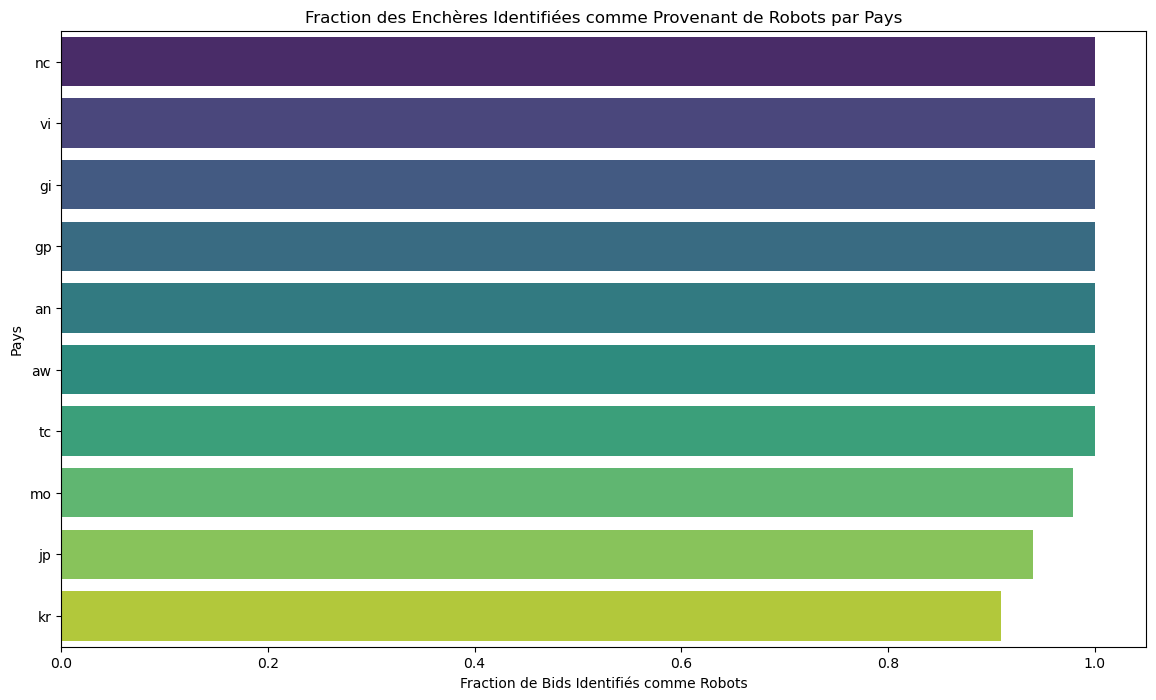

In [32]:
# 4. For each country, the fraction of times a bid from that country was identified as coming from a robot

# Join the two files on the 'bidder_id' column
merged = pd.merge(bids, train, on='bidder_id', how='inner')

# Calculate the total number of bids for each country
total_bids_by_country = merged.groupby('country').size().reset_index(name='total_bids')

# Calculate the number of bids identified as coming from a robot for each country
robot_bids_by_country = merged[merged['outcome'] == 1.0].groupby('country').size().reset_index(name='robot_bids')

# Merge the two DataFrames on the 'country' column
merged_df = pd.merge(total_bids_by_country, robot_bids_by_country, on='country', how='left')

# Replace NaN values with 0 in the 'robot_bids' column
merged_df['robot_bids'] = merged_df['robot_bids'].fillna(0)

merged_df['fraction_robot_bids'] = merged_df['robot_bids'] / merged_df['total_bids']
merged_df = merged_df.sort_values(by='fraction_robot_bids', ascending=False)

# Draw the result
plt.figure(figsize=(14, 8))
sns.barplot(x='fraction_robot_bids', y='country', data=merged_df.head(10), palette='viridis')

plt.xlabel('Fraction de Bids Identifiés comme Robots')
plt.ylabel('Pays')
plt.title('Fraction des Enchères Identifiées comme Provenant de Robots par Pays')
plt.xticks(rotation=90)
plt.show()